## **Gram Schmidt**

In [ ]:
## Importing libraries:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def Gram_Schmidt(A):
  [row,col] = np.shape(A)
  Q = np.zeros((row,col))
  Q[:,0] = A[:,0]/np.linalg.norm(A[:,0])
  for j in range(1,col):
    Sum = np.zeros(row).T
    for i in range(j+1):
      Sum += ((A[:,j].T @ Q[:,i]) * Q[:,i])
    yj = A[:,j] - Sum
    Q[:,j] = yj/np.linalg.norm(yj)
  R = (Q.T).dot(A)
  return Q, R

## **Changed Gram Schmidt**

In [ ]:
def Changed_Gram_Schmidt(A):
  dummy = A.copy()
  Q = np.zeros(A.shape)
  R = np.zeros(A.shape)
  cols = A.shape[1]
  for c in range(cols):
    Q[:,c] = dummy[:,c] / np.linalg.norm(dummy[:,c])
    for i in range(c, cols):
      R[c,i] = Q[:,c].dot(dummy[:,i])
      dummy[:,i] -= R[c,i]*Q[:,c]
  return Q, R

## **Testing the algorithms**

In [ ]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))
# set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))
# set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1),dtype=float))
# Set S to a diagonal matrix values between 2−1 and 2−(n+1)
A = np.matmul(U,np.matmul(S,V))

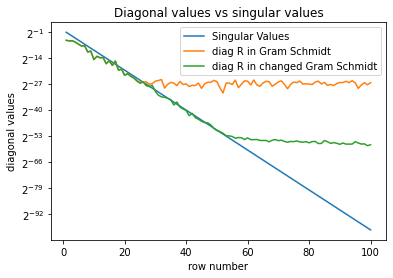

In [ ]:
Q_Gram_Schmidt, R_Gram_Schmidt = Gram_Schmidt(A)
diag_Gram_Schmidt = np.diag(R_Gram_Schmidt)
Q_changed_Gram_Schmidt, R_changed_Gram_Schmidt = Changed_Gram_Schmidt(A)
diag_changed_Gram_Schmidt = np.diag(R_changed_Gram_Schmidt)

# Plotting the graph of singular values:
N = np.arange(1,n+1)
plt.semilogy(N, abs(np.diag(S)), basey = 2)
plt.semilogy(N, abs(diag_Gram_Schmidt), basey = 2)
plt.semilogy(N, abs(diag_changed_Gram_Schmidt), basey = 2)
plt.legend(['Singular Values','diag R in Gram Schmidt','diag R in changed Gram Schmidt'])
plt.xlabel('row number')
plt.ylabel('diagonal values')
plt.title('Diagonal values vs singular values')
plt.show()

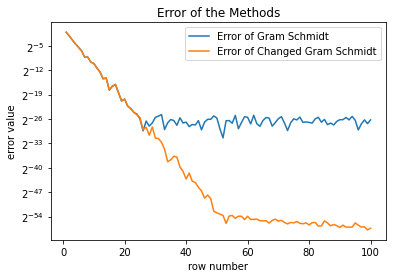

In [ ]:
# Plotting the Error Graph:
plt.semilogy(N, abs(abs(diag_Gram_Schmidt) - abs(np.diag(S))), basey = 2)
plt.semilogy(N, abs(abs(diag_changed_Gram_Schmidt) - abs(np.diag(S))), basey = 2)
plt.legend(['Error of Gram Schmidt','Error of Changed Gram Schmidt'])
plt.xlabel('row number')
plt.ylabel('error value')
plt.title('Error of the Methods')
plt.show()